In [1]:
from sklearn.metrics import plot_confusion_matrix



In [2]:
import random
random.seed(53)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
from sklearn.svm import LinearSVC
from sklearn import metrics
import pandas as pd
tweets_df=pd.read_csv('TrumpTrudeau.csv', encoding='utf-8')
tweets_df.head()

,Unnamed: 0,id,author,status
0,0,1,Donald J. Trump,I will be making a major statement from the @W...
1,1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [4]:
y=tweets_df['author']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(tweets_df['status'],y,random_state=53,test_size=.33)

In [6]:
count_vectorizer=CountVectorizer(stop_words='english',max_df=0.9,min_df=0.05)
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [7]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.05)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [8]:
tfidf_nb=MultinomialNB()

In [9]:
tfidf_nb.fit(tfidf_train,y_train)
tfidf_nb_pred=tfidf_nb.predict(tfidf_test)
tfidf_nb_score=metrics.accuracy_score(tfidf_nb_pred,y_test)

In [10]:
count_nb=MultinomialNB()
count_nb.fit(count_train,y_train)
count_nb_pred=count_nb.predict(count_test)
count_nb_score=metrics.accuracy_score(count_nb_pred,y_test)

In [11]:
print('NaiveBayes Tfidf Score:',tfidf_nb_score)
print('NaiveBayes Count Score:',count_nb_score)

NaiveBayes Tfidf Score: 0.803030303030303
NaiveBayes Count Score: 0.7954545454545454


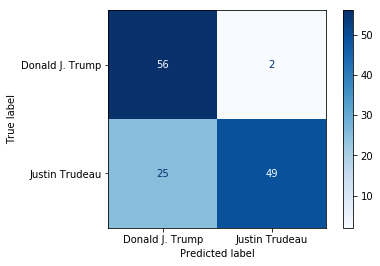

In [19]:
disp = plot_confusion_matrix(count_nb, count_test, y_test,
                                 display_labels=["Donald J. Trump", "Justin Trudeau"],
                                 cmap=plt.cm.Blues)

In [15]:
import matplotlib.pyplot as plt

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt=DecisionTreeClassifier()

In [36]:
dt.fit(count_train,y_train)
dt_predict=dt.predict(count_test)
dt_scores=metrics.accuracy_score(dt_predict,y_test)

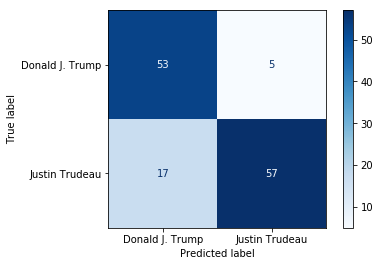

In [37]:
disp = plot_confusion_matrix(dt, count_test, y_test,
                                 display_labels=["Donald J. Trump", "Justin Trudeau"],
                                 cmap=plt.cm.Blues)

In [38]:
dt_scores

0.8333333333333334

In [40]:
case=pd.read_csv("owid-covid-data.csv")

In [44]:
import datetime as dt

In [45]:
case["date"]=pd.to_datetime(case["date"])

In [46]:
case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [47]:
case["date"]=case["date"].map(dt.datetime.toordinal)

In [48]:
case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,737424,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,737425,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,737426,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,737427,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,737428,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [52]:
dt = datetime.fromordinal(733828)

In [51]:
from datetime import datetime


In [53]:
dt

datetime.datetime(2010, 2, 25, 0, 0)

In [54]:
case[case["location"]=="India"]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
11849,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11850,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11851,IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11852,IND,Asia,India,737427,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11853,IND,Asia,India,737428,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11854,IND,Asia,India,737429,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11855,IND,Asia,India,737430,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11856,IND,Asia,India,737431,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11857,IND,Asia,India,737432,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
11858,IND,Asia,India,737433,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
